In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle 


In [2]:
df_res_drif = pd.read_pickle("/srv/scratch/z5297792/ESP_Paper_Data/df_res_drifter_ESPRA.pkl")
df_res_sat = pd.read_pickle("/srv/scratch/z5297792/ESP_Paper_Data/df_res_satellite_ESPRA.pkl")
df_res_sadcp = pd.read_pickle("/srv/scratch/z5297792/ESP_Paper_Data/df_res_sadcp_ESPRA.pkl")


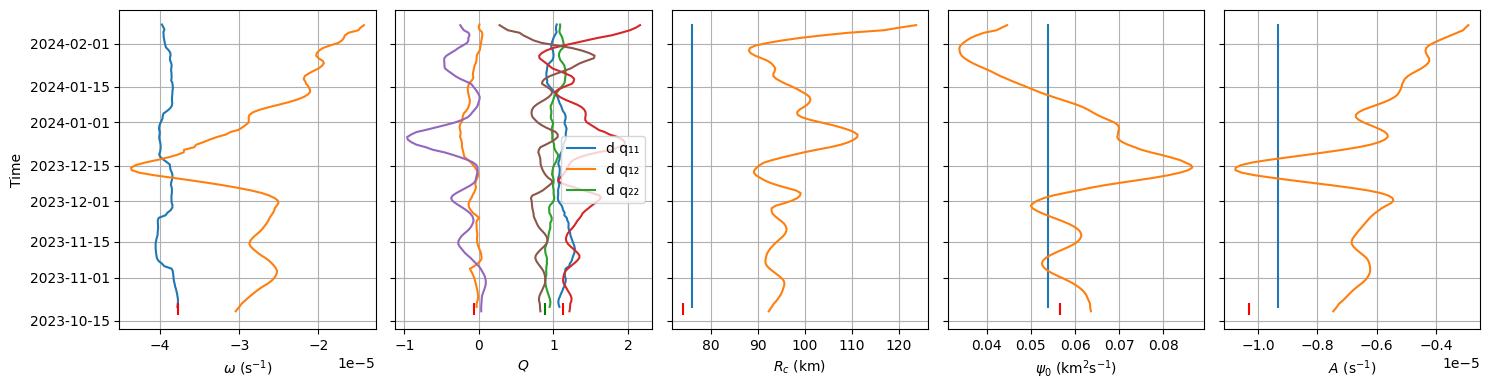

In [3]:
data = df_res_sadcp.iloc[0]

fig, axs = plt.subplots(1, 5, figsize=(15,4), sharey=True)
alpha = .4

axs[0].plot(df_res_drif.sw, df_res_drif.Time)
axs[0].plot(df_res_sat.sw, df_res_sat.Time)
axs[0].vlines(x=data.sw, color='r', ymin=data.Time_min, ymax=data.Time_max)
axs[0].set_xlabel(r'$\omega$ (s$^{-1}$)')

axs[1].plot(df_res_drif.sq11, df_res_drif.Time, label='d q₁₁')
axs[1].plot(df_res_drif.sq12, df_res_drif.Time, label='d q₁₂')
axs[1].plot(df_res_drif.sq22, df_res_drif.Time, label='d q₂₂')

axs[1].plot(df_res_sat.sq11, df_res_sat.Time)
axs[1].plot(df_res_sat.sq12, df_res_sat.Time)
axs[1].plot(df_res_sat.sq22, df_res_sat.Time)

axs[1].vlines(x=data.sq11, color='r', ymin=data.Time_min, ymax=data.Time_max)
axs[1].vlines(x=data.sq12, color='r', ymin=data.Time_min, ymax=data.Time_max)
axs[1].vlines(x=data.sq22, color='g', ymin=data.Time_min, ymax=data.Time_max)

axs[1].set_xlabel(r'$Q$')
axs[1].legend()

axs[2].plot(df_res_drif.sRc/1e3, df_res_drif.Time)
axs[2].plot(df_res_sat.sRc/1e3, df_res_sat.Time)
axs[2].vlines(x=data.sRc/1e3, color='r', ymin=data.Time_min, ymax=data.Time_max)
axs[2].set_xlabel(r'$R_c$ (km)')

axs[3].plot(df_res_drif.spsi0/1e6, df_res_drif.Time)
axs[3].plot(df_res_sat.spsi0/1e6, df_res_sat.Time)
axs[3].vlines(x=data.spsi0/1e6, color='r', ymin=data.Time_min, ymax=data.Time_max)
axs[3].set_xlabel(r'$\psi_0$ (km$^2$s$^{-1}$)')

axs[4].plot(df_res_drif.sA, df_res_drif.Time)
axs[4].plot(df_res_sat.sA, df_res_sat.Time)
axs[4].vlines(x=data.sA, color='r', ymin=data.Time_min, ymax=data.Time_max)
axs[4].set_xlabel(r'$A$ (s$^{-1}$)')

for ax in axs:
    ax.grid(True)
axs[0].set_ylabel('Time')

plt.tight_layout()


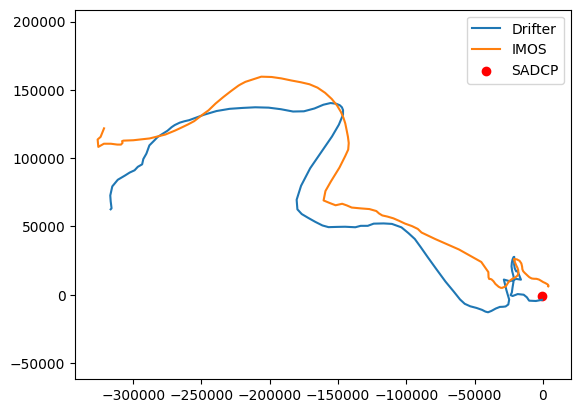

In [11]:
plt.plot(df_res_drif.sxc, df_res_drif.syc, label='Drifter')
plt.plot(df_res_sat.sxc, df_res_sat.syc, label='IMOS')
plt.scatter(data.sxc, data.syc, color='r', label='SADCP')
plt.axis('equal'); plt.legend()


In [4]:
df_res_sadcp


,xc,yc,w,Q,Rc,psi0,A,Depth,sxc,syc,...,sq12,sq22,sRc,spsi0,sA,Time_min,Time_max,Time_mean,Data,Method
0,-445.309760,-802.349574,-0.000038,"[[1.1196212337874922, -0.05425745600970383], [...",73351.909284,56286.255494,-0.000010,37,-331.135914,-620.325110,...,-0.065549,0.890094,74111.139958,56506.208846,-0.000010,2023-10-17 10:42:30.333327,2023-10-21 22:12:30.333314,2023-10-19 16:17:12.325756928,SADCP,ESPRA
1,-426.760775,-752.520964,-0.000038,"[[1.1272551312982821, -0.06179234272428538], [...",73986.775620,56458.383440,-0.000010,47,-153.240110,-432.206346,...,-0.072363,0.888586,74697.759494,56701.005027,-0.000010,2023-10-17 10:42:30.333327,2023-10-21 22:12:30.333314,2023-10-19 16:17:12.325756928,SADCP,ESPRA
2,-121.337207,-306.104792,-0.000037,"[[1.138577315788801, -0.08059583541290456], [-...",74994.734971,56773.987603,-0.000010,57,35.866072,-227.095655,...,-0.075927,0.888980,75169.610847,56737.190211,-0.000010,2023-10-17 10:42:30.333327,2023-10-21 22:12:30.333314,2023-10-19 16:17:12.325756928,SADCP,ESPRA
3,380.447300,132.149946,-0.000037,"[[1.1408848402504919, -0.0928051589648608], [-...",76457.618103,57285.393572,-0.000010,67,231.259961,39.011098,...,-0.078508,0.890202,75694.045169,56658.347923,-0.000010,2023-10-17 10:42:30.333327,2023-10-21 22:12:30.333314,2023-10-19 16:17:12.325756928,SADCP,ESPRA
4,792.290803,593.347112,-0.000036,"[[1.1320222668095692, -0.09018288386905272], [...",77057.016258,56881.930945,-0.000010,77,358.883778,257.776901,...,-0.076243,0.895256,75873.533116,56417.371778,-0.000010,2023-10-17 10:42:30.333327,2023-10-21 22:12:30.333314,2023-10-19 16:17:12.325756928,SADCP,ESPRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,81.561444,263.929582,-0.000027,"[[1.034234353045548, -0.05920513638176992], [-...",72604.908643,40419.356586,-0.000008,657,197.443433,337.853568,...,-0.064417,0.971853,72638.456817,40419.507998,-0.000008,2023-10-17 10:42:30.333327,2023-10-21 22:12:30.333314,2023-10-19 16:17:12.325756928,SADCP,ESPRA
63,396.968732,537.876599,-0.000027,"[[1.0189269015633746, -0.08063798039600249], [...",72446.650539,40072.231433,-0.000008,667,199.001246,600.049764,...,-0.073523,0.981839,72714.046790,40077.746425,-0.000008,2023-10-17 10:42:30.333327,2023-10-21 22:12:30.333314,2023-10-19 16:17:12.325756928,SADCP,ESPRA
64,679.189553,934.340982,-0.000027,"[[1.0186255894665464, -0.09031272217427395], [...",72904.592383,39763.120625,-0.000007,677,76.587057,913.082498,...,-0.083113,0.992969,72952.770524,39705.150537,-0.000007,2023-10-17 10:42:30.333327,2023-10-21 22:12:30.333314,2023-10-19 16:17:12.325756928,SADCP,ESPRA
65,-140.341615,1286.284498,-0.000026,"[[1.0082128320922448, -0.08672512602753576], [...",73045.756712,39387.470368,-0.000007,687,75.343461,1075.370726,...,-0.089090,0.998639,73039.735994,39526.599025,-0.000007,2023-10-17 10:42:30.333327,2023-10-21 22:12:30.333314,2023-10-19 16:17:12.325756928,SADCP,ESPRA
